In [1]:
# importing libraries 
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# importing the data using pandas 
raw_data = pd.read_csv("Credit_Card_Applications.csv")
raw_data2 = raw_data.drop('Class', 1)
raw_data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
#normalizing the data and seperating input and output data using iloc 
input_data = raw_data.iloc[:, :-1].values
output_data = raw_data.iloc[:, -1].values

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0,1))

scaled_input_data = sc.fit_transform(input_data)


In [4]:
#traing the SOM model
from minisom import MiniSom

# 10x10 grid , input_len = 15 columns in input_data, default value, sigma = 1.0
som = MiniSom(x= 10, y = 10,input_len= 15, sigma = 1.0, learning_rate= 0.2)
som.random_weights_init(scaled_input_data)
som.train_random(scaled_input_data, num_iteration= 100)


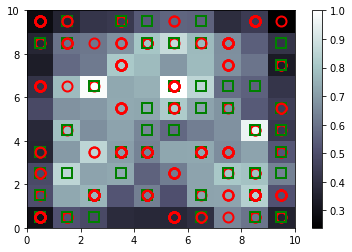

In [5]:
#visualizing the results
from pylab import bone, pcolor , colorbar, plot, show 

bone() # creates a white window which will create the map
pcolor(som.distance_map().T) #transforming distance map into different colors
colorbar() 
markers = ["o", "s"]
colors = ["r", "g"] 


for i, x in enumerate(scaled_input_data):
    winning_node = som.winner(x)
    plot(winning_node[0] + 0.5, # x-axis and 0.5 to put in center
         winning_node[1] + 0.5,
         markers[output_data[i]],
         markeredgecolor = colors[output_data[i]],
         markerfacecolor = "None",
         markersize = 10,
         markeredgewidth = 2)
show()
         
         
         

In [6]:
#finding frauds in the bank 
Mapping = som.win_map(scaled_input_data)
frauds = np.concatenate((Mapping[(5,9)], Mapping [(5,2)]), axis= 0)

frauds = sc.inverse_transform(frauds) #inversing the normalizing value to original

frauds

df_frauds = pd.DataFrame(frauds, columns= raw_data2.columns)
df_frauds

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,15573798.0,1.0,32.25,14.000,1.0,1.0,1.0,0.000,0.0,1.0,2.0,0.0,2.0,160.0,2.0
1,15576680.0,1.0,24.08,0.875,2.0,7.0,4.0,0.085,0.0,1.0,4.0,0.0,2.0,254.0,1951.0
2,15593178.0,1.0,31.08,1.500,1.0,9.0,4.0,0.040,0.0,0.0,0.0,0.0,1.0,160.0,1.0
3,15599152.0,1.0,16.92,0.335,1.0,4.0,4.0,0.290,0.0,0.0,0.0,0.0,1.0,200.0,1.0
4,15642001.0,1.0,34.83,2.500,1.0,9.0,4.0,3.000,0.0,0.0,0.0,0.0,1.0,200.0,1.0
5,15642063.0,1.0,34.67,1.080,2.0,7.0,4.0,1.165,0.0,0.0,0.0,0.0,1.0,28.0,1.0
6,15599535.0,1.0,39.42,1.710,1.0,7.0,4.0,0.165,0.0,0.0,0.0,0.0,1.0,400.0,1.0
7,15654760.0,1.0,23.75,12.000,2.0,8.0,4.0,2.085,0.0,0.0,0.0,0.0,1.0,80.0,1.0
8,15611794.0,1.0,17.67,4.460,2.0,8.0,4.0,0.250,0.0,0.0,0.0,0.0,1.0,80.0,1.0


In [7]:
#creating ANN model 

customers = raw_data.iloc[:, 1:].values #we dont need customersid for ANN model
is_fraud = np.zeros(len(raw_data)) # using SOM frauds list makijng new vector

for i in range(len(raw_data)):
    if raw_data.iloc[i,0] in frauds:
        is_fraud[i] = 1

is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
customers = ss.fit_transform(customers)

input_layer = 15
hidden_layer = 2
outputsize = 1

model= tf.keras.Sequential([
    tf.keras.layers.Dense(input_layer),
    
    tf.keras.layers.Dense(hidden_layer, activation= "relu"),

    tf.keras.layers.Dense(outputsize, activation= "sigmoid"),
])

model.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ['accuracy'])

# early_stopping = tf.keras.callbacks.EarlyStopping()

model.fit( customers, is_fraud,  batch_size = 1, epochs = 4, verbose= 2)

Epoch 1/4
690/690 - 0s - loss: 0.3611 - accuracy: 0.9551
Epoch 2/4
690/690 - 0s - loss: 0.0777 - accuracy: 0.9870
Epoch 3/4
690/690 - 0s - loss: 0.0625 - accuracy: 0.9870
Epoch 4/4
690/690 - 0s - loss: 0.0496 - accuracy: 0.9870


In [9]:
#predicting the probablity of fraud

output_pred = model.predict(customers)

output_pred.shape

(690, 1)

In [10]:
output_pred = np.concatenate((raw_data.iloc[:, 0:1].values, output_pred), axis =1)

#output_pred = output_pred[output_pred[:,1].argsort()]

output_pred.shape

(690, 2)

In [11]:
output_pred = output_pred[output_pred[:,1].argsort()]

output_pred.shape


(690, 2)

In [12]:
df_output = pd.DataFrame(output_pred, columns= ["CustomerId", "Predictions"])

df_output

,CustomerId,Predictions
0,15673907.0,0.000015
1,15757434.0,0.000021
2,15668679.0,0.000039
3,15725028.0,0.000042
4,15593345.0,0.000046
...,...,...
685,15593178.0,0.337551
686,15599152.0,0.337551
687,15658504.0,0.337551
688,15599535.0,0.337551
